<h1>Calcular riesgo de otorgar créditos bancario</h1>
<h2>Autor: Juan Francisco Espinosa Maya</h2>
<h3>El set de datos usados corresponde a usuarios alemanes de los que se tiene consiste en la edad, sexo, trabajo, descripción de la riqueza , etc.. y su rendimiento de riesgo al otorgar un crédito, esta ultima feature es el feature objetivo</h3>

<a href="https://www.kaggle.com/competitions/credit-risk-classifier/data">Datos en :https://www.kaggle.com/competitions/credit-risk-classifier/data</a>

In [1]:
import pandas as pd

<h3>Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)</h3>

In [2]:
data=pd.read_csv('german_credit_data_training_set.csv',index_col=0)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Unnamed: 0,,,,,,,,,,
675,26,female,3,rent,little,NaN,4530,30,radio/TV,good
703,41,male,2,own,moderate,moderate,2503,30,business,good
12,22,female,2,own,little,moderate,1567,12,radio/TV,good
845,35,male,2,own,NaN,moderate,3976,21,furniture/equipment,good
795,22,female,2,rent,moderate,NaN,2301,9,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
284,37,male,2,own,moderate,moderate,3878,24,car,good
169,31,male,2,own,little,moderate,1935,24,business,bad
856,40,female,2,own,NaN,NaN,894,10,education,good


<h2>1.- Exploración general de los datos:</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 675 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   651 non-null    object
 5   Checking account  477 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
 9   Risk              800 non-null    object
dtypes: int64(4), object(6)
memory usage: 68.8+ KB


<h3>Existe cierto desbalanceo en los datos</h3>

In [4]:
data['Risk'].value_counts()

Risk
good    560
bad     240
Name: count, dtype: int64

<h3>Traducimos de la siguiente manera en los reisgos: good=0 y bad=1.</h3>

In [5]:
data['Risk'] = data['Risk'].replace({'good': 0, 'bad': 1})


C:\Users\ffesp\AppData\Local\Temp\ipykernel_11788\3966598167.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Risk'] = data['Risk'].replace({'good': 0, 'bad': 1})


<h3>1.1 Manejo de datos faltantes.</h3>
<h3>Los datos faltantes están en las columnas Saving accounts y Checking account </h3>

In [6]:
saving_cheking_data=data[['Saving accounts','Checking account']].copy()
saving_cheking_data

,Saving accounts,Checking account
Unnamed: 0,,
675,little,NaN
703,moderate,moderate
12,little,moderate
845,NaN,moderate
795,moderate,NaN
...,...,...
284,moderate,moderate
169,little,moderate
856,NaN,NaN


<h3>Notamos que los datos son variables categoricas, si fuesen númericas aportarían mucho más</h3>

<h4> Rellenaremos los datos según su moda en el faltante de Saving accounts o Checking account. Es decir, si tenemos valores faltantes en Checking account pero sí tenemos en Saving accounts, entonces rellenaremos por la moda que presenta ese Saving accounts </h4>

In [7]:
saving_cheking_data['Credit month']=data['Credit amount']/data['Duration']

In [8]:
data['Saving accounts'].value_counts()

Saving accounts
little        480
moderate       87
quite rich     48
rich           36
Name: count, dtype: int64

In [9]:
data['Checking account'].value_counts()

Checking account
little      225
moderate    201
rich         51
Name: count, dtype: int64

In [13]:
pivot_SavingandCheking=data.pivot_table(index='Saving accounts',columns='Checking account',aggfunc='size',fill_value=0)
replace_Saving=pivot_SavingandCheking.idxmax()
replace_Cheking=pivot_SavingandCheking.idxmax(axis=1)
pivot_SavingandCheking

Checking account,little,moderate,rich
Saving accounts,,,
little,361,147,41
moderate,10,72,5
quite rich,6,39,3
rich,5,29,2


In [11]:
import numpy as np
def replace_nan_Saving_Cheking(data,replace_Saving,replace_Cheking,replace_Saving_and_Cheking=None):
    new_Saving_Cheking=pd.DataFrame(index=data.index, columns=['Saving accounts','Checking account'])
    for i in data.index:
        old_Saving=data.loc[i,'Saving accounts']
        old_Cheking=data.loc[i,'Checking account']

        if pd.isna(old_Saving)==True and pd.isna(old_Cheking)==False:
            new_Saving_Cheking.loc[i,'Saving accounts']=replace_Saving[old_Cheking]
            new_Saving_Cheking.loc[i,'Checking account']=old_Cheking
        elif pd.isna(old_Cheking)==True and pd.isna(old_Saving)==False:
            new_Saving_Cheking.loc[i,'Checking account']=replace_Cheking[old_Saving]
            new_Saving_Cheking.loc[i,'Saving accounts']=old_Saving
        elif pd.isna(old_Cheking)==False and pd.isna(old_Saving)==False:
            new_Saving_Cheking.loc[i,'Checking account']=old_Cheking
            new_Saving_Cheking.loc[i,'Saving accounts']=old_Saving

    new_data=data.copy()
    new_data['Saving accounts']=new_Saving_Cheking['Saving accounts']
    new_data['Checking account']=new_Saving_Cheking['Checking account']
    
    return new_data
data=replace_nan_Saving_Cheking(data,replace_Saving,replace_Cheking)

<h4>No usaremos los datos que en ambos Saving accounts y Checking account son nulos</h4>

In [12]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Unnamed: 0,,,,,,,,,,
675,26,female,3,rent,little,little,4530,30,radio/TV,0
703,41,male,2,own,moderate,moderate,2503,30,business,0
12,22,female,2,own,little,moderate,1567,12,radio/TV,0
845,35,male,2,own,little,moderate,3976,21,furniture/equipment,0
795,22,female,2,rent,moderate,moderate,2301,9,furniture/equipment,0
...,...,...,...,...,...,...,...,...,...,...
284,37,male,2,own,moderate,moderate,3878,24,car,0
169,31,male,2,own,little,moderate,1935,24,business,1
856,40,female,2,own,NaN,NaN,894,10,education,0


<h3>1.2.- Manejo de algunas features</h3>
<h3>A veces existe más de un solo propósito para el credito y son separados por /:</h3>

In [13]:
data['Purpose'].value_counts()

Purpose
car                    267
radio/TV               225
furniture/equipment    150
business                78
education               44
repairs                 20
domestic appliances      8
vacation/others          8
Name: count, dtype: int64

<h4>De esta forma se separan en columnas por cada propósito.</h4>

In [14]:
separated_purpose=data['Purpose'].str.split('/',expand=True)
separated_purpose

,0,1
Unnamed: 0,,
675,radio,TV
703,business,None
12,radio,TV
845,furniture,equipment
795,furniture,equipment
...,...,...
284,car,None
169,business,None
856,education,None


In [15]:
separated_purpose.rename(columns={0:'1_purpose',1:'2_purpose'},inplace=True)

In [16]:
separated_purpose['1_purpose'].value_counts()

1_purpose
car                    267
radio                  225
furniture              150
business                78
education               44
repairs                 20
domestic appliances      8
vacation                 8
Name: count, dtype: int64

In [17]:
separated_purpose['2_purpose'].value_counts()

2_purpose
TV           225
equipment    150
others         8
Name: count, dtype: int64

<h4>Si no se tiene un segundo propósito, entonces se rellena con Nothing</h4>

In [18]:
separated_purpose.fillna('Nothing',inplace=True)
separated_purpose

,1_purpose,2_purpose
Unnamed: 0,,
675,radio,TV
703,business,Nothing
12,radio,TV
845,furniture,equipment
795,furniture,equipment
...,...,...
284,car,Nothing
169,business,Nothing
856,education,Nothing


<h4>Agregamos lo obtenido al dataset</h4>

In [19]:
data=data.drop(columns='Purpose').join(separated_purpose,how='left',on=data.index).drop(columns='key_0')
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,1_purpose,2_purpose
Unnamed: 0,,,,,,,,,,,
675,26,female,3,rent,little,little,4530,30,0,radio,TV
703,41,male,2,own,moderate,moderate,2503,30,0,business,Nothing
12,22,female,2,own,little,moderate,1567,12,0,radio,TV
845,35,male,2,own,little,moderate,3976,21,0,furniture,equipment
795,22,female,2,rent,moderate,moderate,2301,9,0,furniture,equipment
...,...,...,...,...,...,...,...,...,...,...,...
284,37,male,2,own,moderate,moderate,3878,24,0,car,Nothing
169,31,male,2,own,little,moderate,1935,24,1,business,Nothing
856,40,female,2,own,NaN,NaN,894,10,0,education,Nothing


<h3>1.3.- Codificación de variables categoricas:</h3>
<h3>Ahora, se codifican las variables categoricas para que el modelo de Machine Learning pueda procesarlas</h3>


<H4>Los datos nulos se sustituyen por -1 </H4>


In [20]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
object_cols=data.select_dtypes(include='object').columns.tolist()
oe=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoded = oe.fit_transform(data[object_cols])

<h3>Se eliminan los datos con Saving y Account nulos</h3>

In [21]:
df_encoded=pd.DataFrame(index=data.index,data=encoded, columns=object_cols)
df_encoded=df_encoded.fillna(-1).astype('Int64')
data[object_cols]=df_encoded[object_cols]
data.dropna(inplace=True)

In [22]:
import numpy as np
data.replace(-1,np.nan,inplace=True)

In [23]:
data.dropna(inplace=True)

In [24]:
X=data.drop(columns='Risk')
y=data['Risk']

<h2>2.-Predicciones:</h2>

<h3>2.1.-Importancia de features:</h3>

<h3>Se usará iv (importance values) y woe (weight of evidence), muy usado para la predicción de riesgo crediticio.</h3>

In [25]:
data_train=X.copy()
data_train['Risk']=y

In [26]:
   
def calculate_bin_and_iv_df(df,target,bins=None):
    df_bins=pd.DataFrame(index=df.index)
    df_iv=pd.DataFrame()
    
    #all_woe=pd.DataFrame()
    for col in df.drop(columns=target).columns:
        if bins != None:
            df_bins[col+'_bin']=make_bins(col,df,bins)
            iv=calculate_woe_and_iv(df_bins[col+'_bin'],df[target])
            n_bins=bins
        else:
            df_bins[col+'_bin'],iv,n_bins=evaluate_bin_iv(col,df,target)
            
        iv=calculate_woe_and_iv(df_bins[col+'_bin'],df[target])
        df_iv=pd.concat([df_iv,pd.DataFrame(index=[col+'_bin'],columns=['IV','n_bins'],data=[[iv,n_bins]])])


    return df_iv.sort_values(by='IV',ascending=False),df_bins.join(df[target],how='left')

def make_bins(col,df,bins):
    if data[col].dtype.kind in 'bifc' and data[col].nunique() > bins:
        return pd.qcut(df[col],q=bins,duplicates='drop')
    else:
        return df[col]
            
def calculate_woe_and_iv(df_bins_col,target_column):
    pos_events=df_bins_col[target_column==1].value_counts()
    porcentage_pos_events=np.maximum(pos_events,0.5) / pos_events.sum()
    
    neg_events=df_bins_col[target_column==0].value_counts()
    porcentage_neg_events=np.maximum(neg_events,0.5) / neg_events.sum()

    woe= np.log(porcentage_neg_events/porcentage_pos_events)
    iv=woe*(porcentage_neg_events-porcentage_pos_events)
    
    return iv.sum()

In [27]:
from joblib import Parallel, delayed
import numpy as np
def _evaluate_single_bins(col, df, target, bins):
    binned_col = make_bins(col, df, bins)

    # Validar tamaño mínimo de bins
    if (binned_col.value_counts(normalize=True) < 0.05).any():
        return None

    iv = calculate_woe_and_iv(binned_col, df[target])
    return bins, iv, binned_col
def evaluate_bin_iv(col, df, target, n_jobs=-1):
    values = df[col]
    max_bins = values.nunique()

    if max_bins <= 9:
        iv = calculate_woe_and_iv(values, df[target])
        return values, iv, 0

    bins_range = range(1, max_bins // 5)

    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(_evaluate_single_bins)(col, df, target, bins)
        for bins in bins_range
    )

    # Filtrar resultados inválidos
    results = [r for r in results if r is not None]

    if not results:
        return None, None, None

    # Seleccionar mejor IV
    best_bins, best_iv, best_binned_col = max(results, key=lambda x: x[1])

    return best_binned_col, best_iv, best_bins
def get_strong_features(df,target,bins=None):
    iv_rank,new_df=calculate_bin_and_iv_df(df,target,bins)
    new_df=new_df[iv_rank[iv_rank['IV']>0.02].index.values]
    new_df_cols=list(new_df.columns.str[:-4])
    new_df_cols.append(target)

    new_df[target]=df[target]

    return iv_rank,encode_df_iv(new_df),new_df,df[new_df_cols]

def encode_df_iv(df_iv):
    encoded_df=df_iv.copy()
    for col in df_iv.select_dtypes(include=["category"]).columns:
        encoded_df[col]=encoded_df[col].cat.codes
    return encoded_df

<h3>Resultados de iv y el número de bins sobre el conjunto de train:</h3>

In [28]:
get_strong_features(data_train,'Risk',bins=None)[0]

,IV,n_bins
Credit amount_bin,0.333172,18
Duration_bin,0.226327,5
1_purpose_bin,0.116841,0
Saving accounts_bin,0.110742,0
2_purpose_bin,0.096220,0
Age_bin,0.089449,9
Housing_bin,0.077870,0
Sex_bin,0.025749,0
Checking account_bin,0.021607,0
Job_bin,0.005058,0


In [29]:
X_bined=get_strong_features(data_train,'Risk',bins=None)[2]
X=get_strong_features(data_train,'Risk',bins=None)[3]
y=X['Risk']
X=X.drop(columns='Risk')
X

,Credit amount,Duration,1_purpose,Saving accounts,2_purpose,Age,Housing,Sex,Checking account
Unnamed: 0,,,,,,,,,
675,4530,30,5,0,1,26,2,0,0
703,2503,30,0,1,0,41,1,1,1
12,1567,12,5,0,1,22,1,0,1
845,3976,21,4,0,2,35,1,1,1
795,2301,9,4,1,2,22,2,0,1
...,...,...,...,...,...,...,...,...,...
747,1274,12,1,0,0,37,1,0,0
284,3878,24,1,1,0,37,1,1,1
169,1935,24,0,0,0,31,1,1,1


<h3>Ajustar los datos para entradas futuras:</h3>

In [30]:
import pandas as pd

def bin_new_data(data_bined,data_new):


    data_new_encoded = pd.DataFrame(index=data_new.index)

    for col in data_bined.columns:
        
        # Solo procesar columnas categóricas
        if pd.api.types.is_categorical_dtype(data_bined[col]):

            categories = data_bined[col].cat.categories

            data_new_cat = pd.Categorical(
                data_new[col[:-4]],
                categories=categories,
                ordered=True
            )

            # Representante oficial: cat.codes
            data_new_encoded[col[:-4]] = data_new_cat.codes
        else:
            data_new_encoded[col[:-4]]=data_new[col[:-4]]

    return data_new_encoded



<h3>2.3.- Modelos de Machine Learning: </h3>

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<h4>Lo que nos interesa es minimizar el riesgo, es decir, detectar correctamente a los usuarios con alto riesgo creditico y estar muy seguro de aquellos créditos a otorgar. Para este objetivo nos fijaremos en las métricas:
<ul>
<li>Recall para la clase 1, que evita los falsos negativos, es decir a aquellos riesgos que se clasificaron como 0(no riesgo), mientras en realidad son 1(si riesgo).</li>
<li>Para la clase 0, tenemos precision, que mide los verdaderos positivos para la clase 0, es decir, aquellos elementos 0 que fueron correctamente predichos.</li>

</ul>
    </h4>

<h4>Como hay un desbalance en los datos para los riesgos, usaremos oversampling y daremos más peso a los clasificados como riesgosos</h4>

In [33]:
import numpy as np

neg, pos = np.bincount(y_train)
ratio = neg / pos
ratio


np.float64(2.0157068062827226)

<h3>Random Forest con ROC para observar la separación de clases del modelo:</h3>

In [133]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

import numpy as np

pipeline_rf = Pipeline([
    ('oversampling', RandomOverSampler(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42,n_jobs=-1))
])

param_grid_rf = {
    'oversampling__sampling_strategy': [ 0.75, 0.85,1.0],
    'rf__class_weight': [{0:1,1:1.5*ratio},{0:1,1:1*ratio},'balanced',{0:1,1:1.5},{0:1,1:1.2},{0:1,1:1.3},{0:1,1:1.1}],
    'rf__bootstrap': [True, False],
    'rf__n_estimators': [200, 400, 600, 800],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': [20, 25, 30, 35],
    'rf__min_samples_split': [14, 15, 16],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7, 0.9],

    'rf__max_samples': [0.5, 0.6, 0.7, 0.8, None],
    'rf__min_weight_fraction_leaf': [0.0, 0.01, 0.04],
    'rf__oob_score': [True, False],
    'rf__warm_start': [False], 
    'rf__ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

random_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_grid_rf,
    n_iter=3000,              
    cv=5,
    scoring='roc_auc',       
    random_state=42,
    n_jobs=-1,
    error_score=np.nan
)

random_rf.fit(X_train, y_train)

print("Mejores parámetros:")
print(random_rf.best_params_)

print("Mejor score CV:")
print(random_rf.best_score_)



Mejores parámetros:
{'rf__warm_start': False, 'rf__oob_score': False, 'rf__n_estimators': 600, 'rf__min_weight_fraction_leaf': 0.01, 'rf__min_samples_split': 14, 'rf__min_samples_leaf': 4, 'rf__max_samples': 0.6, 'rf__max_features': 0.3, 'rf__max_depth': 20, 'rf__criterion': 'gini', 'rf__class_weight': 'balanced', 'rf__ccp_alpha': 0.01, 'rf__bootstrap': True, 'oversampling__sampling_strategy': 0.85}
Mejor score CV:
0.6693411851306588


<h3> No es un pésimo resultado, pero tampoco es muy bueno, esto lo ajustaremos con Monte Carlo</h3>

ROC AUC: 0.6965452847805789


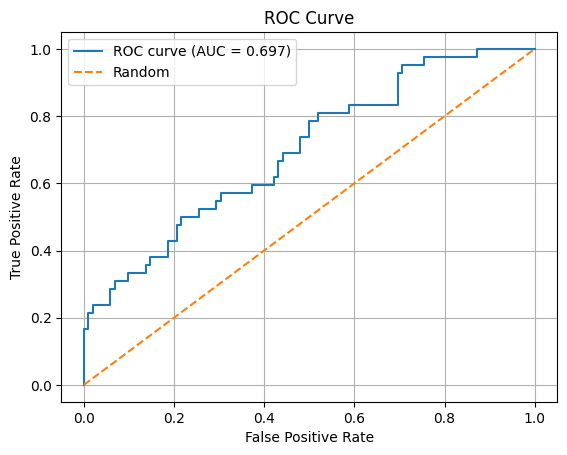

In [242]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades de la clase positiva
y_proba = random_rf.predict_proba(X_test)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

# Predicciones
y_pred = random_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       102
           1       0.43      0.57      0.49        42

    accuracy                           0.65       144
   macro avg       0.61      0.63      0.61       144
weighted avg       0.69      0.65      0.66       144



<h3>2.4.-Montecarlo</h3>

<h4>Ahora, implementaremos Montecarlo para reducir la varianza y sesgo que puede generar el seleccionar una parte de los datos. Con este método, también maximizaremos nuestras métricas y daremos margenes de riesgo de nuestras predicciones. </h4>

In [138]:
from sklearn import clone
from sklearn.metrics import roc_auc_score,recall_score,accuracy_score,balanced_accuracy_score,precision_score

def montecarlo(model,X_train,y_train,X_test,y_test,n_iterations,threshold=0.5):
    model_clone=clone(model)
    df_montecarlo=pd.DataFrame(index=X_test.index)
    df_metrics=pd.DataFrame(columns=['recall_clase_1','precision_clase_0','precision_clase_1'])
    for i in range(n_iterations):
        X_train_montecarlo=X_train.sample(frac=1,replace=True)
        y_train_montecarlo=y_train.loc[X_train_montecarlo.index]

        model_clone.fit(X_train_montecarlo,y_train_montecarlo)
        
        y_pred_proba=model_clone.predict_proba(X_test)[:,1]
        df_montecarlo['it'+str(i)]=y_pred_proba
        

        y_pred=np.where(y_pred_proba > threshold, 1, 0)
        df_metrics.loc[i,]=[recall_score(y_test,y_pred,pos_label=1),precision_score(y_test,y_pred,pos_label=0),precision_score(y_test,y_pred,pos_label=1)]

    mean_pred=df_montecarlo.mean(axis=1)
    std_pred=df_montecarlo.std(axis=1)
    return pd.DataFrame(index=df_montecarlo.index, data={'mean':mean_pred,'std':std_pred}),df_metrics



<h3>2.4.1.- Montecarlo en train:</h3>

In [164]:
montecarlo_df_train,montecarlo_metrics_train=montecarlo(random_rf.best_estimator_,X_train,y_train,X_train,y_train,1000)

<h3>Para los datos de entrenamiento, tenemos que el límite 0.43 permite un bastante buen Recall para 1 y Presicion para 0. Además, un accuracy de 0.65, que no es muy alto, pues estamos construyendo un modelo estricto con dar el valor de no peligroso a un crédito.</h3>

In [247]:
montecarlo_df_train['predicts'] = 1
montecarlo_df_train.loc[(montecarlo_df_train['mean']) < 0.43,'predicts']=0


print(classification_report(y_train, montecarlo_df_train['predicts']))

              precision    recall  f1-score   support

           0       0.90      0.55      0.68       385
           1       0.49      0.87      0.63       191

    accuracy                           0.66       576
   macro avg       0.69      0.71      0.65       576
weighted avg       0.76      0.66      0.66       576




<h3>En la siguiente gráfica, tenemos de color azul aquellas probabilidades de muestras que se clasificarán como 0. A partir de 0.43 (línea punteada) se clasifica como riesgoso.</h3>

In [241]:
montecarlo_df_train,montecarlo_metrics_train=montecarlo(random_rf.best_estimator_,X_train,y_train,X_train,y_train,1000,threshold= 0.43) 
#Se vuelve a hacer pero ahora para el límite antes ewstablecido

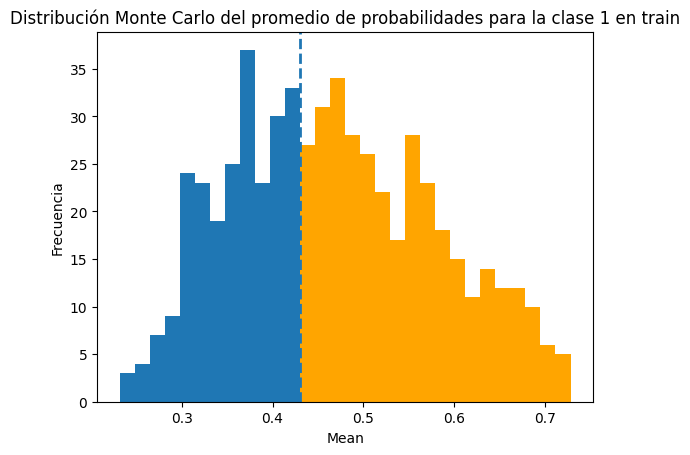

In [226]:
import matplotlib.pyplot as plt
import numpy as np

data=montecarlo_df_train['mean']

plt.figure()
counts,bins,patches=plt.hist(data, bins=30)

for bin_left,patch in zip(bins[:-1], patches):
    if bin_left >= 0.43:
        patch.set_facecolor('orange')
plt.axvline(0.43, linestyle='--', linewidth=2)

plt.xlabel('Promedio de probabilidades para 1')
plt.ylabel('Frecuencia')
plt.title('Distribución Monte Carlo del promedio de probabilidades para la clase 1 en train')

plt.show()


<h3>Monte Carlo baja la varianza en train: </h3>

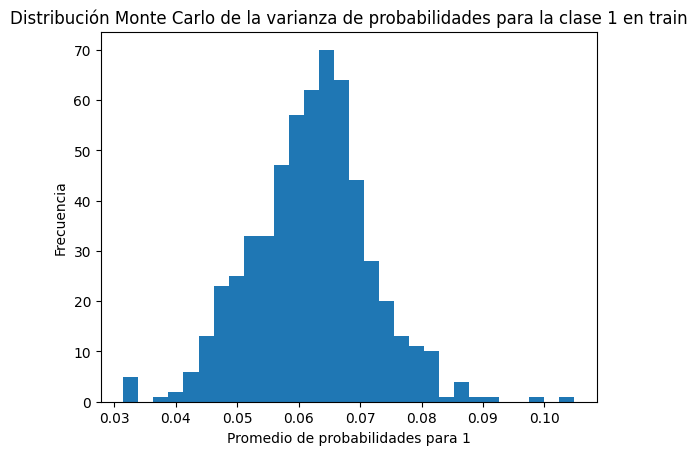

In [261]:
import matplotlib.pyplot as plt
import numpy as np

data=montecarlo_df_train['std']

plt.figure()
counts,bins,patches=plt.hist(data, bins=30)

plt.xlabel('Promedio de probabilidades para 1')
plt.ylabel('Frecuencia')
plt.title('Distribución Monte Carlo de la varianza de probabilidades para la clase 1 en train')

plt.show()


In [234]:
import numpy as np
import matplotlib.pyplot as plt

def plot_montecarlo_ci(series, metric_name, ci=0.95, bins=40):
    data = series.dropna().values

    mean = np.mean(data)
    var = np.var(data, ddof=1)

    alpha = 1 - ci
    lower = np.quantile(data, alpha / 2)
    upper = np.quantile(data, 1 - alpha / 2)

    plt.figure()
    counts, bin_edges, patches = plt.hist(data, bins=bins)

    # Colorear bins dentro del IC
    for left_edge, patch in zip(bin_edges[:-1], patches):
        if lower <= left_edge <= upper:
            patch.set_facecolor('orange')

    # Líneas
    plt.axvline(mean, linestyle='--', linewidth=2, label=f"Media = {mean:.3f}")
    plt.axvline(lower, linestyle=':', linewidth=2, label=f"IC {ci*100:.0f}% Inf = {lower:.3f}")
    plt.axvline(upper, linestyle=':', linewidth=2, label=f"IC {ci*100:.0f}% Sup = {upper:.3f}")

    plt.xlabel(metric_name)
    plt.ylabel("Frecuencia")
    plt.title(f"Monte Carlo – {metric_name}\nVarianza = {var:.4f}")
    plt.legend()
    plt.show()

    return {
        "media": mean,
        "varianza": var,
        "ic_inferior": lower,
        "ic_superior": upper
    }


<h3>En train, tenemos que la siguiente gráfica de Monte Carlo nos predice con un 95% de confianza que los créditos otorgados serán pagados con una certeza de 85% ± 0.04.</h3>

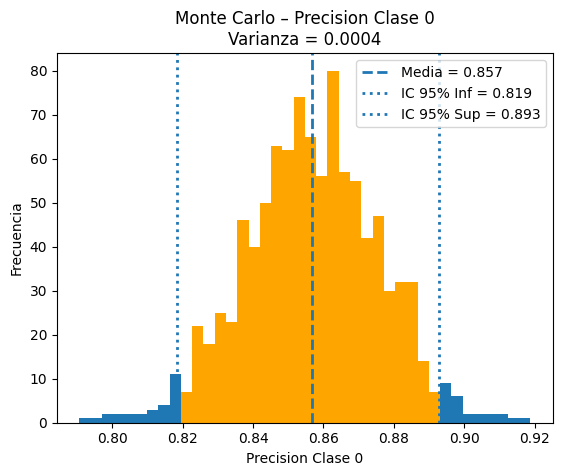

In [235]:
res_precision_0 = plot_montecarlo_ci(
    montecarlo_metrics_train['precision_clase_0'],
    metric_name="Precision Clase 0 en test"
)


<h3> También, se predice que se tendrá un 95% de confianza para tener una certeza del 80%±0.16 en evitar dar un crédito y no se pague.<h3>

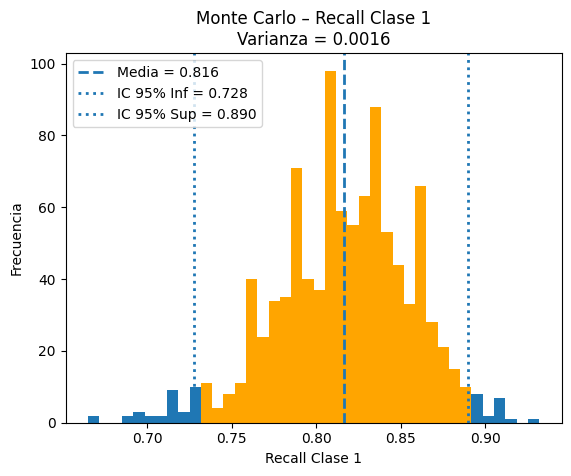

In [236]:
res_recall_1 = plot_montecarlo_ci(
    montecarlo_metrics_train['recall_clase_1'],
    metric_name="Recall Clase 1 en test"
)



<h3>2.4.2.- Montecarlo en test:</h3>

<h3>En los datos de prueba, se obtuvieron buenos resultados para tener certeza en aquellos créditos otorgados y aquellos rechazados a la hora de correr riesgos.</h3>

<h3>Como es muy estricto este modelo, se están rechzando algunos elementos que pudieron haber pagado el crédito, pero no se les dió. Esto se puede mejorar en un futuro y con datos más detalaldos que con los que se tienen en este notebook.</h3>

              precision    recall  f1-score   support

           0       0.87      0.51      0.64       102
           1       0.40      0.81      0.54        42

    accuracy                           0.60       144
   macro avg       0.64      0.66      0.59       144
weighted avg       0.73      0.60      0.61       144



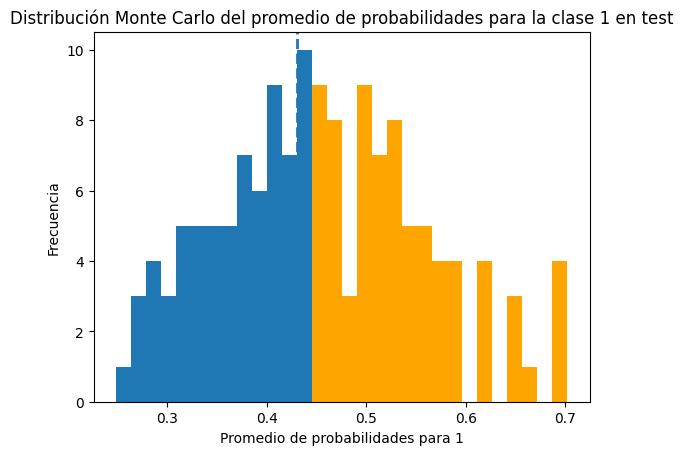

In [256]:
import matplotlib.pyplot as plt
import numpy as np

data=montecarlo_df_test['mean']

plt.figure()
counts,bins,patches=plt.hist(data, bins=30)

for bin_left,patch in zip(bins[:-1], patches):
    if bin_left >= 0.43:
        patch.set_facecolor('orange')
plt.axvline(0.43, linestyle='--', linewidth=2)

plt.xlabel('Promedio de probabilidades para 1')
plt.ylabel('Frecuencia')
plt.title('Distribución Monte Carlo del promedio de probabilidades para la clase 1 en test')
print(classification_report(y_test, montecarlo_df_test['predicts']))
plt.show()

<h3>Observamos que las distribuciones de las probabilidades para la clase 1 entre train y test son parecidas, al menos no existen evidencias por las pruebas de Welch y Kolmogorov Smirnov para señalar que son  diferentes (p-valor mayor a 0.05). Por lo que se puede esperar el mismo comportamiento.</h3>

In [276]:
import numpy as np
from scipy.stats import ttest_ind
t_stat, p_value=ttest_ind(montecarlo_df_train['mean'], montecarlo_df_test['mean'], equal_var=False)

print(f"Media Train: {montecarlo_df_train['mean'].mean()}")
print(f"Media Test: {montecarlo_df_test['mean'].mean()}")
print(f"Var Train: {montecarlo_df_train['mean'].var()}")
print(f"Var Test: {montecarlo_df_test['mean'].var()}")

print("Prueba t de Welch")
print(f"estadistico t: {t_stat}")
print(f"p-valor: {p_value: }")

ks_stat, p_value = ks_2samp(montecarlo_df_train['mean'], montecarlo_df_test['mean'])
print("Kolmogorov Smirnov")
print(f"estadistico ks (D): {ks_stat:}")
print(f"p-value         : {p_value:}")

Media Train: 0.46710586636464185
Media Test: 0.45471815345016253
Var Train: 0.012631202894046241
Var Test: 0.010420622406556642
Prueba t de Welch
estadistico t: 1.2756975135833284
p-valor:  0.20330939538015108
Kolmogorov Smirnov
estadistico ks (D): 0.09895833333333333
p-value         : 0.20126596133156635


<h3>Montecarlo también reduce la varianza en test:</h3>

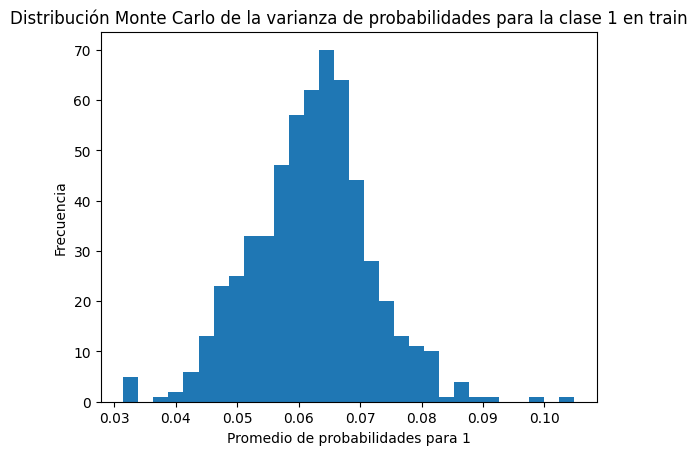

In [262]:
import matplotlib.pyplot as plt
import numpy as np

data=montecarlo_df_train['std']

plt.figure()
counts,bins,patches=plt.hist(data, bins=30)

plt.xlabel('Promedio de probabilidades para 1')
plt.ylabel('Frecuencia')
plt.title('Distribución Monte Carlo de la varianza de probabilidades para la clase 1 en train')

plt.show()


<h3>Ahora, las métricas obtenidas en el set de datos de pruebas:</h3>

<h3>Comprobando, también tenemos buenos resultados en el test para elegir dar créditos a quienes los pagarán, con un 83% ± 0.10 de certeza</h3>

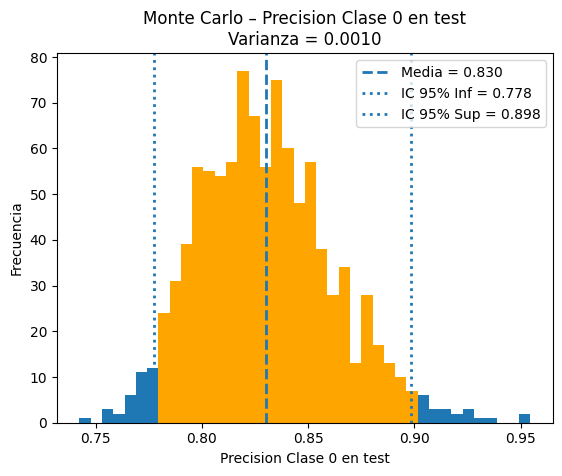

In [253]:
res_precision_0 = plot_montecarlo_ci(
    montecarlo_metrics_test['precision_clase_0'],
    metric_name="Precision Clase 0 en test"
)


<h3>Para evitar riesgos, tenemos un 74%±0.46 de certeza:</h3>

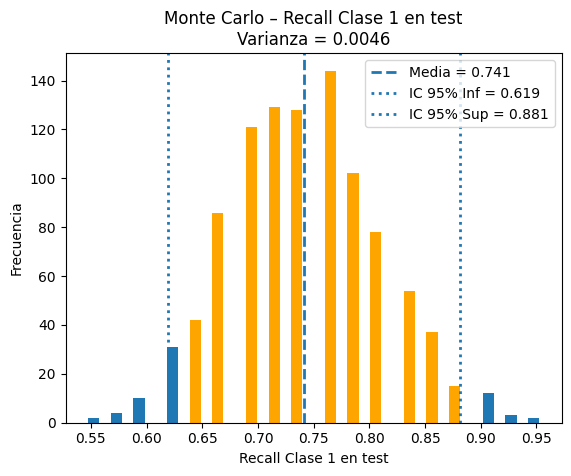

In [254]:
res_recall_1 = plot_montecarlo_ci(
    montecarlo_metrics_test['recall_clase_1'],
    metric_name="Recall Clase 1 en test"
)


<h3>Concluimos que nuestro modelo es bueno para prevenir riesgos y genera confianza en que los detectados como aptos, pagarán</h3>

<h2>Con un seguimiento de los clientes, se pueden obtener datos que se perzonalicen a los clientes por medio de redes neuronales. Además, dependiendo de la naturaleza de los datos, es posible detectar los pagos realizados y los riesgos que se pueden correr al momento de dar un crédito, esto si se tiene el historial de pagos a lo largo de los meses.</h2>